In [5]:
import pytesseract
import cv2
import re
from pytesseract import Output
from PIL import Image
import os
from PIL import Image, ImageEnhance, ImageFilter
from matplotlib import pyplot as plt
import numpy as np

In [16]:
import cv2
import numpy as np

img = cv2.imread('../imgss/card2.jpg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

def ocr_core(filename):
    text = pytesseract.image_to_string(Image.open(filename), config="--psm 6")
    return text

(381, 634, 3)


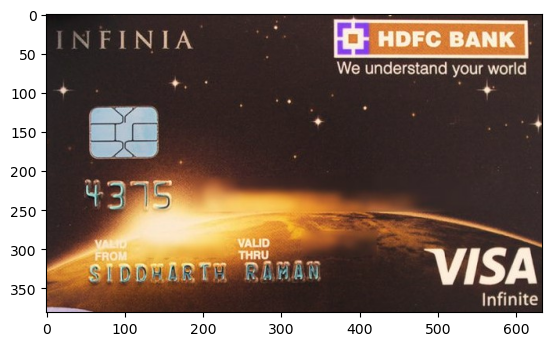

In [24]:
card_image = cv2.imread("../imgss/card2.jpg")
plt.imshow(card_image)
print(card_image.shape)

(381, 634)


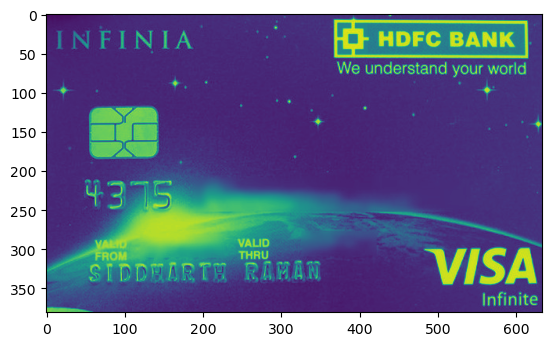

In [22]:
gray = get_grayscale(card_image)
plt.imshow(gray)
print(gray.shape)

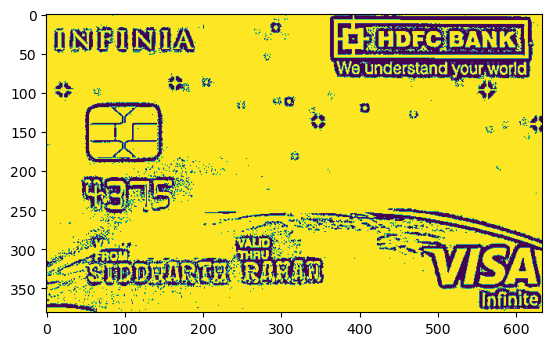

In [20]:
# value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
adaptive_mean = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
plt.imshow(adaptive_mean)

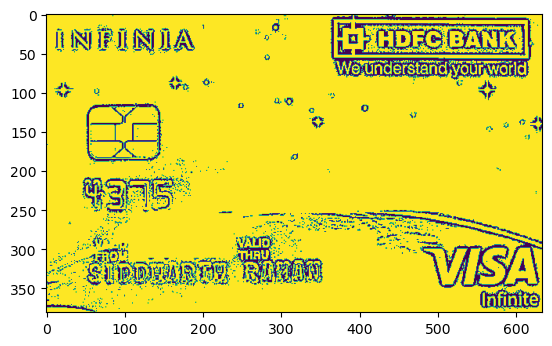

In [21]:
adaptive_guaissian = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
plt.imshow(adaptive_guaissian)

In [14]:
# text = ocr_core(otsu)
# print(text)
ones = np.ones((3,3), np.int8)
ones

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int8)

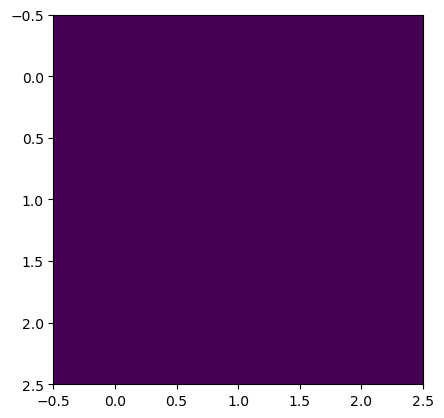

In [13]:
plt.imshow(ones)

In [5]:

thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

In [22]:
# FIRST METHOD
image = "../imgss/dd.jpg"
image2 = "../imgss/card2.jpg"
image3 = "../imgss/3aXRulAEe5W2.jpg"
custom_config = r'--oem 3 --psm 6'



text = ocr_core(image)
text2 = ocr_core(image2)
text3 = ocr_core(image3)
print(text)
print(text2)
print(text3)

HtUOB  krisFiyer®
5211 1820 1234 8888
we 04/22 4
ROYSTON LEE
8102172196 mastercard

: We understand your world
« Re a,
Sh j ; + i * : “4
,
a = —
é P RRRAR VISA
Infinite

Debit
D)



In [12]:
# SECOND METHOD
im = Image.open("./imgss/3aXRulAEe5W2.jpg") # the second one 
im = im.filter(ImageFilter.MedianFilter())
enhancer = ImageEnhance.Contrast(im)
im = enhancer.enhance(2)
im = im.convert('1')
im.save('temp2.jpg')
text = pytesseract.image_to_string(Image.open('temp2.jpg'))
print(text)